# Estimating Value of Single Family Properties 

- **SAROJ DUWAL**
- **07-26-2022**

# Project Goal
- #### The main objective of this project is to identify key features that influence the value of  Single Family Properties that were sold in 2017.
- #### Build a regression model to predict the property value.

# Project Description:
In this project different features that has influence on determining the home value will be analyzed to predict the home value. Different regression model will becreated and the model performing best overall will be choosen.


# Initial Questions

1. **Does number of bedrooms have influence on home value?**
2. **Does number of bathrooms determines the price of the property?**
3. **Does interior area(in sq.feet) adds value to the property?**
4. **Does the county_code have huge influence in property value estimate?**

# Data Acquisition



### Acquiring zillow data from CodeUp SQL Database
- #### I used the zillow data from CodeUp DB server. 
- #### I selected columns that I needed for the project by joining predictions_2017 and propertylandusedesc to properties_2017.

In [1]:
#import acquire module
from acquire import zillow_data

In [2]:
# import acquire module
df= zillow_data()
df.head()

,property_id,bath,bed,sq_ft_area,yearbuilt,home_estimate,county_code
0,13081610,2.0,3.0,1324.0,1963.0,518089.0,6037.0
1,13072593,3.0,4.0,3551.0,1994.0,1609238.0,6037.0
2,10712949,3.0,4.0,2519.0,1965.0,106406.0,6037.0
3,12380151,2.0,3.0,1285.0,1955.0,369853.0,6037.0
4,12422102,1.0,3.0,1254.0,1954.0,65848.0,6037.0


In [3]:
df.shape

(52441, 7)

#  Data Preparation


### I cleaned the data acquired   using following cleaning process:
1. using function null_handlers to to drop null values. Since 99% of data are retained after dropping nulls from dataframe.
2. Converted the columns to appropriate dataypes using optimize function
3. Outliers in the data were handle by using handle_outliers function.
4. All these functions to clean data were wrapped in a single function as prep_zillow function.

In [4]:
# import  prepare module
from prepare import prep_zillow

import warnings
warnings.filterwarnings('ignore')

In [5]:
df= prep_zillow(df)
df.head()

,property_id,bath,bed,sq_ft_area,yearbuilt,home_estimate,county_code
0,13081610,2.0,3,1324,1963,518089,6037
1,13072593,3.0,4,3551,1994,1609238,6037
2,10712949,3.0,4,2519,1965,106406,6037
3,12380151,2.0,3,1285,1955,369853,6037
4,12422102,1.0,3,1254,1954,65848,6037


In [6]:
df.shape

(51265, 7)

# Split Data

### Splitting cleaned data to Train, Validate and Test Samples to avoid data leakage
- split_data function split the data into train, validate and test samples.
- I used the train sample to explore, scale and  fit the modules.
- Validate Sample was used to validate the model performance and test for the overfitting
- The test sample was used to estimate how the final modekl will perform on future unseen data.

In [7]:
# import split_data function from prepare module
from prepare import split_data

In [8]:
train, validate, test = split_data(df)
print('Train:',train.shape)
print('Validate:',validate.shape)
print('Test:',test.shape)

Train: (28708, 7)
Validate: (12304, 7)
Test: (10253, 7)


# Data Exploration Analysis
- All the libraries needed for data exploration and statistical testing were imported

In [9]:
# Import all the libraries needed for the exploration part including statistics.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


## Question 1
- Does number of bedrooms have influence on home value?

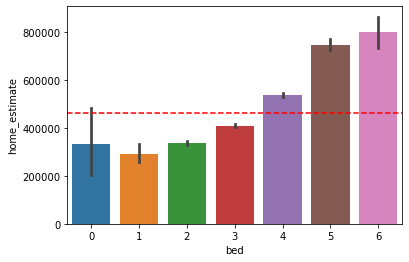

In [10]:
sns.barplot(data =train, x='bed',y='home_estimate')
avg_home_value = train.home_estimate.mean()
plt.axhline(avg_home_value,ls='--', label = 'Average Home Value', color='red')
plt.show()



### Statistical Testing
The objective of pearsonr test is to analyze the realationship between the continuous variables.
- α = 0.05
- $H_0$ : Both features are independent to each other.
- $H_a$ : Both variable do have some correlation.

In [11]:
α =0.05
corr, p = stats.pearsonr(train['bed'], train['home_estimate'])

if p< α:
    print('Since  p< α, these two  variables are dependent to eachother.\nNull Hypothesis rejected')
else:
    print('Two  varaibles are independent to each other.\nFail to reject null hypothesis ')

Since  p< α, these two  variables are dependent to eachother.
Null Hypothesis rejected


### Answer to question 1
from the visualisation it is clear that number of bedroom does indeed increases the property value and the statistical testing shows both are correlated.

## Question 2
- Does number of bathrooms determines the price of the property?

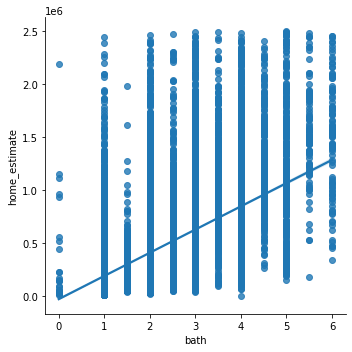

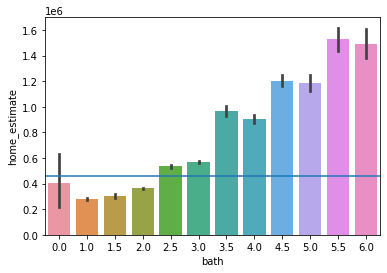

In [12]:
sns.lmplot(x='bath',y='home_estimate', data= train)
plt.show()

sns.barplot(data =train, x='bath',y='home_estimate')
avg_home_value = train.home_estimate.mean()
plt.axhline(avg_home_value)
plt.show()

### Statistical Testing
The objective of pearsonr test is to analyze the realationship between the continuous variables.
- α = 0.05
- $H_0$ : Both features are independent to each other.
- $H_a$ : Both variable do have some correlation.

In [13]:
α =0.05
corr, p = stats.pearsonr(train['bath'], train['home_estimate'])

if p< α:
    print('Since  p< α, these two  variables are dependent to eachother.\nNull Hypothesis rejected')
else:
    print('Two  varaibles are independent to each other.\nFail to reject null hypothesis ')

Since  p< α, these two  variables are dependent to eachother.
Null Hypothesis rejected


#### Answer to question 2
Visualisation between home value and bathroom  indicates number of bathroom  increases the price of the property.

## Question 3
- Does interior area(in sq.feet) adds value to the property?

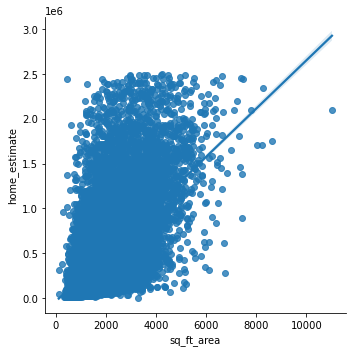

In [14]:
sns.lmplot( data= train, x='sq_ft_area',y='home_estimate')

### Statistical Testing
The objective of pearsonr test is to analyze the realationship between the continuous variables.
- α = 0.05
- $H_0$ : Both features are independent to each other.
- $H_a$ : Both variable do have some correlation.

In [15]:
α =0.05
corr, p = stats.pearsonr(train['sq_ft_area'], train['home_estimate'])

if p< α:
    print('Since  p< α, these two  variables are dependent to eachother.\nNull Hypothesis rejected')
else:
    print('Two  varaibles are independent to each other.\nFail to reject null hypothesis ')

Since  p< α, these two  variables are dependent to eachother.
Null Hypothesis rejected


#### Answer to Question 3
There is a correlation between the  finished interior area and the propety value.

## Question 4
- Does the county_code have huge influence in property value estimate?

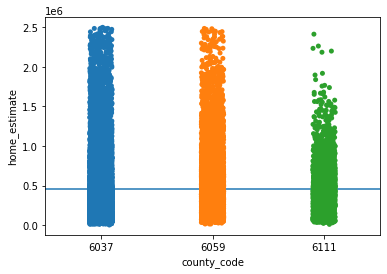

In [16]:
avg_home_value = train.home_estimate.mean()
sns.stripplot(x='county_code',y='home_estimate', data= train)
plt.axhline(avg_home_value)
plt.show()



#### Takeaways from question 4.
Though the county_zipcode  does determine the property value, in this case from above visualisation it indicates that county code does not have that much of influence in this project.

### Key takeaways from Exploration
- number of bedroom, bathroom and interior square foot area are the key features that determines the property value.
- county code was considered not being a key feature

In [18]:
# setting the baseline to the mean of target variable
baseline = round(train.home_estimate.mean(),2)
baseline


from sklearn.metrics import mean_squared_error
from math import sqrt

#Establish baselines for the train and validation subsets
baseline = round(train.home_estimate.mean(),2)

train['baseline'] = baseline
validate['baseline'] = baseline

train_rmse = sqrt(mean_squared_error(train.home_estimate, train.baseline))
valid_rmse = sqrt(mean_squared_error(validate.home_estimate, validate.baseline))

print('Train baseline RMSE: {}.'.format(train_rmse))
print('Validation baseline RMSE: {}.'.format(valid_rmse))

Train baseline RMSE: 391253.4232537626.
Validation baseline RMSE: 387463.7722860653.


# Scaling the Data
- For data scaling I dropped some columns that I deemed unnecessary.
- I will be creating a new dataframe with the columns only applicable for modelling.


In [19]:
# assigin the train, validate and test sample with features I want to use.
X_train = train[['bed','bath','sq_ft_area']]
y_train= train['home_estimate']

X_validate = validate[['bed','bath','sq_ft_area']]
y_validate = validate['home_estimate']


X_test = test[['bed','bath','sq_ft_area']]
y_test = test['home_estimate']


In [20]:
#import sklearn.preprocessing library
import sklearn.preprocessing

# scale the data by using MinMaxScaler
scaler = sklearn.preprocessing.MinMaxScaler()

# Fit the scaler
scaler.fit(X_train)

# Use the scaler to transform train, validate,test
X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)

In [22]:
# changing the scaled samples back to dataframe.
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns= X_train.columns)
X_validate_scaled_df = pd.DataFrame(X_validate_scaled, columns= X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns= X_train.columns)

# changing y(train,vallidate and test) to dataframe
y_train=  pd.DataFrame(y_train)
y_validate= pd.DataFrame(y_validate)
y_test = pd.DataFrame(y_test)
y_validate.head()

,home_estimate
10837,184862
9320,236148
11831,706133
14250,194008
48936,123590


In [23]:
X_train_scaled_df.head()

,bed,bath,sq_ft_area
0,0.500000,0.333333,0.132391
1,0.666667,0.500000,0.312982
2,0.666667,0.666667,0.224109
3,0.333333,0.166667,0.094381
4,0.666667,0.333333,0.098788


# Modeling

  ### Using linear regression, lars and tweedieregressor model and fit it to the data

In [24]:
# import libraries for the regression modelling from sklearn.
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor


# 1.fit the data using linear regression model
lm = LinearRegression()

# fit the data
lm.fit(X_train_scaled_df, y_train)

LinearRegression()

In [25]:
# 2. modeling using lars and fit the data
lars = LassoLars(alpha=1.0)

lars.fit(X_train_scaled_df, y_train)

LassoLars()

In [26]:
#3. #Instantiate TweedieRegressor and fit
glm = TweedieRegressor(power=0, alpha=1)

glm.fit(X_train_scaled_df, y_train)

TweedieRegressor(alpha=1, power=0)

- ### Evaluate all three models using loop method.

In [27]:
#Create a looping statement to evaluate all models
models = [lm, lars, glm]

for model in models:
    y_train[str(model)] = model.predict(X_train_scaled_df)
    rmse_train = sqrt(mean_squared_error(y_train.home_estimate, y_train[str(model)]))
                                         
    
    y_validate[str(model)] = model.predict(X_validate_scaled_df)
    rmse_valid = sqrt(mean_squared_error(y_validate.home_estimate, y_validate[str(model)]))
                                         
    
    print('RMSE for {} model on the train dataset: {}.'.format(model, round(rmse_train, 2)))
    print('RMSE for {} model on the validate dataset: {}.'.format(model, round(rmse_valid, 2)))
    print()

RMSE for LinearRegression() model on the train dataset: 312556.29.
RMSE for LinearRegression() model on the validate dataset: 308717.36.

RMSE for LassoLars() model on the train dataset: 312556.57.
RMSE for LassoLars() model on the validate dataset: 308714.86.

RMSE for TweedieRegressor(alpha=1, power=0) model on the train dataset: 387586.51.
RMSE for TweedieRegressor(alpha=1, power=0) model on the validate dataset: 383764.73.



In [28]:
#Rename my columns so they're easier to access
y_validate.rename(columns={'LinearRegression()': 'lm', 'LassoLars()': 'lars',
                        'TweedieRegressor(alpha=1, power=0)': 'glm'}, inplace=True)

y_validate.columns

Index(['home_estimate', 'lm', 'lars', 'glm'], dtype='object')

Text(0.5, 1.0, 'Actual estimate vs predicted across all models')

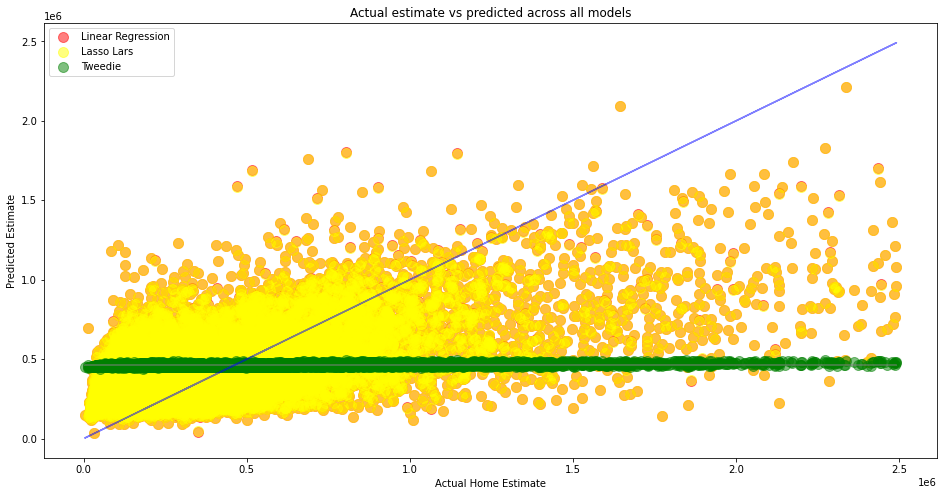

In [29]:
#Plot the predicted home value against the actual home value, with baseline
plt.figure(figsize=(16,8))

plt.plot(y_validate.home_estimate, validate['baseline'], alpha=0.5,
         color='gray', label='_nolegend_')
plt.plot(validate.home_estimate, validate['home_estimate'], alpha=0.5,
         color='blue', label='_nolegend_')

plt.scatter(y_validate.home_estimate, y_validate['lm'], alpha=0.5,
            color='red', s=100, label='Linear Regression')
plt.scatter(y_validate.home_estimate, y_validate['lars'], alpha=0.5,
            color='yellow', s=100, label='Lasso Lars')
plt.scatter(validate.home_estimate, y_validate['glm'], alpha=0.5,
            color='green', s=100, label='Tweedie')

plt.legend()
plt.xlabel('Actual Home Estimate')
plt.ylabel('Predicted Estimate')
plt.title('Actual estimate vs predicted across all models')

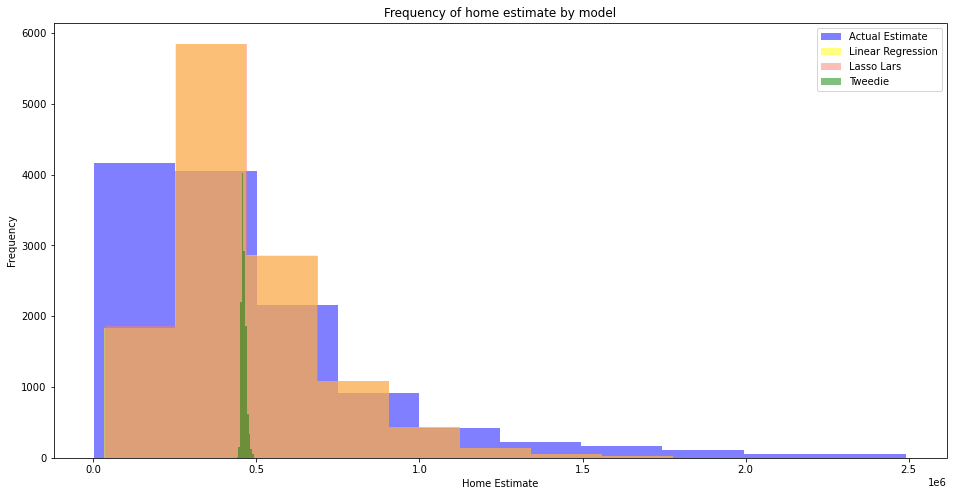

In [30]:
#Distribution of my models' predictions
plt.figure(figsize=(16,8))

plt.hist(y_validate['home_estimate'], color='blue', alpha=0.5, label='Actual Estimate')
plt.hist(y_validate['lm'], color='yellow', alpha=0.5, label='Linear Regression')
plt.hist(y_validate['lars'], color='salmon', alpha=0.5, label='Lasso Lars')
plt.hist(y_validate['glm'], color='green', alpha=0.5, label='Tweedie')

plt.xlabel('Home Estimate')
plt.ylabel('Frequency')
plt.title('Frequency of home estimate by model')
plt.legend()

- ## Since, RMSE for Linear Regression is less than other model, I chose the linear regression as best performing model.

In [34]:
# Evaluating the best performing model on test data
y_test['lm'] = lm.predict(X_test_scaled_df)

rmse_test = sqrt(mean_squared_error(y_test['home_estimate'], y_test['lm']))

print(f'RMSE for OLS model on the test dataset: ',round(rmse_test))

RMSE for OLS model on the test dataset:  313119


# CONCLUSIONS
- OLS Linear Regression model performed better than other two models created.
- Number of bedrooms, bathrooms and interior area(finished)  are correlated to the property estimate.


# RECOMMENDATION
- More features should be explored that were not included in this project.
- Features like yearbuilt and county code should be analysed in depth.

# NEXT STEPS
- More features for the single family properties that could be correlated to the target variable should be explored to make better performing model.
- Most of the features have huge number of null values so in order to use those features I would ask help from my seniors on dealing with those data. 